In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import os
import pandas as pd

def load_data(folder_path):
    all_files = os.listdir(folder_path)
    df_list = []

    for filename in all_files:
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(folder_path, filename), parse_dates=['datetime'])
            df['timeframe'] = filename.split('_')[0]  # Assuming filename contains timeframe
            df_list.append(df)

    full_df = pd.concat(df_list, ignore_index=True)
    return full_df

# Example usage
folder_path = "/content/drive/MyDrive/gw_project/W1"
w1_df = load_data(folder_path)


In [ ]:
w1_df.head()

,datetime,open,high,low,close,volume,timeframe
0,2023-12-18,0.3571,17.2500,0.3571,12.6691,107438877.8,ACEUSDT
1,2023-12-25,12.6759,14.2748,8.5000,9.3278,30494620.5,ACEUSDT
2,2024-01-01,9.3305,11.3547,7.3000,8.4192,37780333.0,ACEUSDT
3,2024-01-08,8.4217,10.0969,7.0500,9.3150,27630624.9,ACEUSDT
4,2024-01-15,9.3000,10.6528,7.3571,8.2744,19130344.3,ACEUSDT


In [ ]:


w1_df = w1_df.rename(columns={'timeframe': 'coin'})

In [ ]:
btc_df = w1_df[w1_df['coin'] == 'BTCUSDT']

In [ ]:


import pandas as pd
w1_df['datetime'] = pd.to_datetime(w1_df['datetime'], format="%Y-%m-%d %H:%M:%S")


In [ ]:


btc_df.index = range(1, len(btc_df) + 1)


# **Data Quality Check**

In [ ]:


# Check for missing values
print("Missing values for each column:")
print(btc_df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:")
print(btc_df.duplicated().sum())

# Descriptive statistics to identify outliers
print("\nDescriptive statistics:")
print(btc_df.describe())

# Optionally, drop duplicates if any
btc_df.drop_duplicates(inplace=True)


Missing values for each column:
datetime    0
open        0
high        0
low         0
close       0
volume      0
coin        0
dtype: int64

Number of duplicate rows:
0

Descriptive statistics:
                  datetime         open          high           low  \
count                  336    336.00000    336.000000    336.000000   
mean   2020-10-29 12:00:00  21003.58369  22553.059435  19446.519762   
min    2017-08-14 00:00:00   3229.22000   3557.750000   2817.000000   
25%    2019-03-23 06:00:00   8053.59250   8512.047500   7316.500000   
50%    2020-10-29 12:00:00  15716.05000  17017.050000  13930.805000   
75%    2022-06-07 18:00:00  30794.98750  34351.970000  29250.790000   
max    2024-01-15 00:00:00  65519.11000  69000.000000  62278.000000   
std                    NaN  15988.38873  17068.845452  14737.233699   

              close        volume  
count    336.000000  3.360000e+02  
mean   21114.191071  5.106100e+05  
min     3228.670000  2.843431e+03  
25%     8058.865000

<ipython-input-544-2c3dfe9d62f9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_df

,datetime,open,high,low,close,volume,coin
1,2017-08-14,4261.48,4485.39,3850.00,4086.29,2843.431426,BTCUSDT
2,2017-08-21,4069.13,4453.91,3400.00,4310.01,4599.396629,BTCUSDT
3,2017-08-28,4310.01,4939.19,4124.54,4509.08,4753.843376,BTCUSDT
4,2017-09-04,4505.00,4788.59,3603.00,4130.37,6382.787745,BTCUSDT
5,2017-09-11,4153.62,4394.59,2817.00,3699.99,8106.705127,BTCUSDT
...,...,...,...,...,...,...,...
332,2023-12-18,41374.64,44398.26,40542.93,42991.50,245481.206120,BTCUSDT
333,2023-12-25,42991.50,43802.32,41300.00,42283.58,228462.702280,BTCUSDT
334,2024-01-01,42283.58,45879.63,40750.00,43929.02,310487.486220,BTCUSDT
335,2024-01-08,43929.01,48969.48,41500.00,41732.35,470798.804340,BTCUSDT


# Exploratory data analysis

# Price Trend Analysis

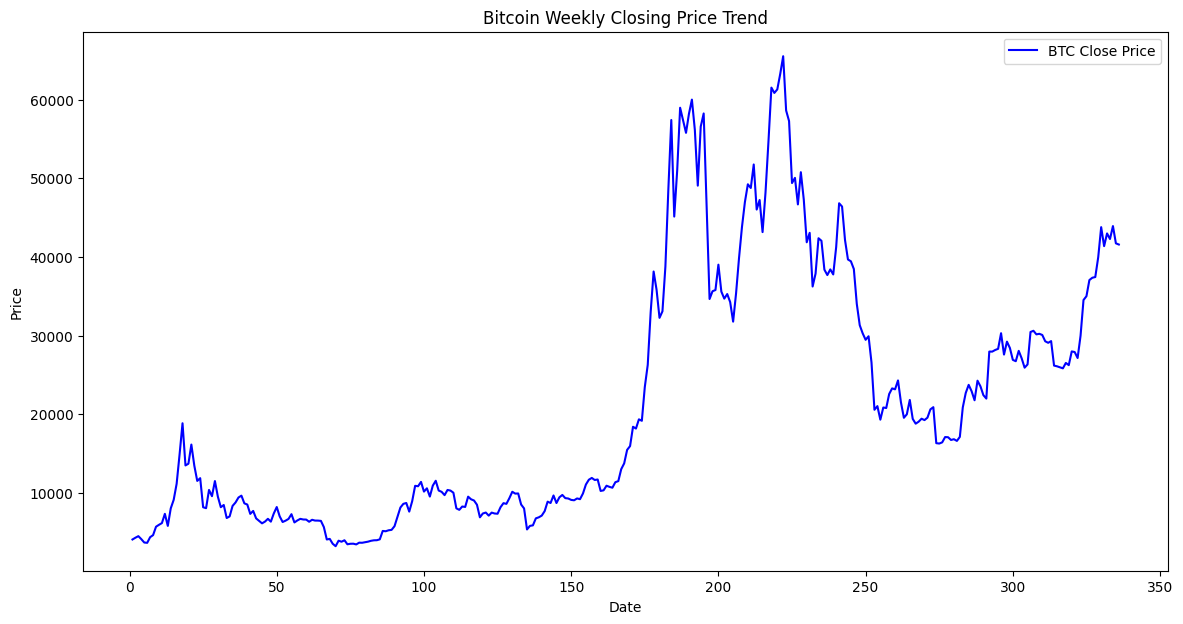

In [ ]:
# Plotting the closing price trends for BTC
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(btc_df.index, btc_df['close'], label='BTC Close Price', color='blue')
plt.title('Bitcoin Weekly Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Distribution of BTC Weekly Closing Prices

In [ ]:
import plotly.graph_objects as go

# Plotting the distribution of weekly closing prices using Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(x=btc_df['close'], nbinsx=50, marker_color='RoyalBlue'))

fig.update_layout(
    title_text='Distribution of Bitcoin Weekly Closing Prices', # Title
    xaxis_title_text='Close Price', # x-axis label
    yaxis_title_text='Count', # y-axis label
    bargap=0.05, # Gap between bars
    template='plotly_dark' # Stylish template
)

fig.show()


# Distribution of eth Weekly Closing Prices

In [ ]:
import plotly.graph_objects as go

#  Plotting the distribution of weekly closing prices using Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(x=eth_df['close'], nbinsx=50, marker_color='RoyalBlue'))

fig.update_layout(
    title_text='Distribution of eth Weekly Closing Prices', # Title
    xaxis_title_text='Close Price', # x-axis label
    yaxis_title_text='Count', # y-axis label
    bargap=0.05, # Gap between bars
    template='plotly_dark' # Stylish template
)

fig.show()


# BTC Price and Moving Averages

In [ ]:
btc_df['MA50'] = btc_df['close'].rolling(window=50).mean()
btc_df['MA200'] = btc_df['close'].rolling(window=200).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['close'], mode='lines', name='BTC Close', opacity=0.5))
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['MA50'], mode='lines', name='50-Week MA'))
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['MA200'], mode='lines', name='200-Week MA'))

fig.update_layout(title='BTC Price and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')
fig.show()


<ipython-input-551-bc0875fd6fd7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-551-bc0875fd6fd7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Investigate correlations and Scatter plot for correlation visualization

In [ ]:

# 1. Explore skewness and kurtosis:

btc_df['close'].skew()
btc_df['close'].kurtosis()

# 2. Investigate correlations:

correlation_matrix = btc_df[['close', 'MA50', 'MA200']].corr()
print(correlation_matrix)

# 3. Scatter plot for correlation visualization:

fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df['close'], y=btc_df['MA50'], mode='markers', name='Close vs. 50-Week MA'))
fig.add_trace(go.Scatter(x=btc_df['close'], y=btc_df['MA200'], mode='markers', name='Close vs. 200-Week MA'))

fig.update_layout(title='Scatter Plot of Correlations',
                  xaxis_title='Close Price',
                  yaxis_title='Moving Average',
                  template='plotly_dark')
fig.show()




          close      MA50     MA200
close  1.000000  0.734053 -0.495671
MA50   0.734053  1.000000 -0.597003
MA200 -0.495671 -0.597003  1.000000


# Return Distribution Analysis

In [ ]:
import plotly.express as px

btc_df['Return'] = btc_df['close'].pct_change()
fig = px.histogram(btc_df, x='Return', nbins=50, marginal='box',
                   title='Distribution of Bitcoin Weekly Returns')
fig.update_layout(template='plotly_dark')
fig.show()


<ipython-input-556-3b9cde0f5784>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Autocorrelation Analysis

In [ ]:
import pandas as pd

# Calculate autocorrelation for various lags
acf_values = [btc_df['Return'].autocorr(lag=i) for i in range(1, 51)]
lags = list(range(1, 51))

# Plotting autocorrelation
fig = go.Figure(go.Bar(x=lags, y=acf_values, marker_color='indianred'))
fig.update_layout(title='Autocorrelation of BTC Returns',
                  xaxis_title='Lag',
                  yaxis_title='Autocorrelation',
                  template='plotly_dark')
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf

# Calculate the autocorrelation function (ACF)
btc_acf = acf(btc_df['Return'].dropna(), nlags=20, fft=True)

# Prepare lag values for the x-axis
lags = list(range(len(btc_acf)))

# Create an interactive bar plot for ACF values
fig = go.Figure()
fig.add_trace(go.Bar(x=lags, y=btc_acf, marker_color='LightSkyBlue'))

# Add styling and layout
fig.update_layout(title='Autocorrelation Function (ACF) for BTC Weekly Returns',
                  xaxis_title='Lag',
                  yaxis_title='ACF Value',
                  template='plotly_dark')

fig.show()


# Market Events Overlay

In [ ]:
significant_dates = ['2019-01-01','2020-03-12', '2024-01-1']

fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['close'], mode='lines', name='BTC Close'))
for date in significant_dates:
    fig.add_vline(x=date, line_width=2, line_dash="dash", line_color="red")

fig.update_layout(title='BTC Price with Significant Market Events',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')
fig.show()


# Seasonal Decomposition of Bitcoin Weekly **Prices**

In [ ]:
# Convert the 'Date' column to datetime
btc_df['datetime'] = pd.to_datetime(btc_df['datetime'])

# Set the 'Date' column as the index
btc_df.set_index('datetime', inplace=True)


<ipython-input-564-5a59378bf51a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Resampling to weekly data, taking the last observation as the weekly closing price
btc_df_weekly = btc_df['close'].resample('W').last()


In [ ]:
# Check for missing values
print("Missing values in each column:\n", btc_df_weekly.isnull().sum())

# Drop any NaN values that might affect the analysis
btc_df_weekly.dropna(inplace=True)


Missing values in each column:
 0


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly, mode='lines', name='BTC Weekly Close'))
fig.update_layout(title='Bitcoin Weekly Closing Prices',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  template='plotly_dark')
fig.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go

# Perform seasonal decomposition
decomposition_result = seasonal_decompose(btc_df_weekly, model='additive')

# Extract the trend, seasonal, and residual components
trend_component = decomposition_result.trend
seasonal_component = decomposition_result.seasonal
residual_component = decomposition_result.resid

# Plotting the decomposed components
fig = go.Figure()

# Trend
fig.add_trace(go.Scatter(x=trend_component.index, y=trend_component, mode='lines', name='Trend'))

# Seasonality
fig.add_trace(go.Scatter(x=seasonal_component.index, y=seasonal_component, mode='lines', name='Seasonality'))

# Residuals
fig.add_trace(go.Scatter(x=residual_component.index, y=residual_component, mode='lines', name='Residuals'))

fig.update_layout(title='Seasonal Decomposition of Bitcoin Weekly Prices',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  template='plotly_dark')

fig.show()


In [ ]:


import pandas as pd
btc_df_weekly = pd.DataFrame(btc_df_weekly)


# Rolling Volatility

In [ ]:
# Calculate daily returns
btc_df_weekly['Return'] = btc_df_weekly['close'].pct_change()

# Calculate the rolling standard deviation of returns (rolling volatility)
window_size = 4  # A month of weekly data
btc_df_weekly['Rolling_Volatility'] = btc_df_weekly['Return'].rolling(window=window_size).std() * np.sqrt(window_size)

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['Rolling_Volatility'], mode='lines', name='Rolling Volatility'))
fig.update_layout(title='BTC Rolling Volatility',
                  xaxis_title='Date',
                  yaxis_title='Volatility',
                  template='plotly_dark')
fig.show()


# Trading Volume Analysis

In [ ]:


btc_df_weekly['volume'] = btc_df['volume']


In [ ]:

btc_df_weekly['Volume'] = btc_df['volume'].resample('W').sum()


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=btc_df_weekly.index, y=btc_df_weekly['Volume'], name='Trading Volume'))
fig.update_layout(title='BTC Trading Volume Over Time',
                  xaxis_title='Date',
                  yaxis_title='Volume',
                  template='plotly_dark')
fig.show()


# Price Change and Return Analysis

In [ ]:
# Calculate daily returns
btc_df_weekly['Daily_Return'] = btc_df_weekly['close'].pct_change()

# Calculate weekly returns by shifting the data by 7 days
btc_df_weekly['Weekly_Return'] = btc_df_weekly['close'].pct_change(periods=7)


In [ ]:
import pandas as pd
import plotly.graph_objects as go


# Calculate daily returns as percentage change of the 'Close' column
btc_df_weekly['Daily_Return'] = btc_df_weekly['close'].pct_change() * 100

# Plotting the returns
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['Daily_Return'], mode='lines', name='Daily Return'))
fig.update_layout(title='Bitcoin Daily Return (%)',
                  xaxis_title='Date',
                  yaxis_title='Daily Return (%)',
                  template='plotly_dark')
fig.show()


# Bitcoin Weekly Candlestick Chart

In [ ]:


# Resampling to get weekly OHLC data
btc_df_weekly = btc_df.resample('W').agg({
    'open': 'first',   # The first open price in the week
    'high': 'max',     # The highest price in the week
    'low': 'min',      # The lowest price in the week
    'close': 'last'    # The last close price in the week
})

# Check the first few rows to confirm it looks as expected
print(btc_df_weekly.head())


import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=btc_df_weekly.index,
                open=btc_df_weekly['open'],
                high=btc_df_weekly['high'],
                low=btc_df_weekly['low'],
                close=btc_df_weekly['close'])])

fig.update_layout(
    title='Bitcoin Weekly Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

fig.show()



               open     high      low    close
datetime                                      
2017-08-20  4261.48  4485.39  3850.00  4086.29
2017-08-27  4069.13  4453.91  3400.00  4310.01
2017-09-03  4310.01  4939.19  4124.54  4509.08
2017-09-10  4505.00  4788.59  3603.00  4130.37
2017-09-17  4153.62  4394.59  2817.00  3699.99


# Bitcoin Close Prices and Moving Averages

In [ ]:
# Calculate the short and long moving averages
btc_df_weekly['SMA_50'] = btc_df_weekly['close'].rolling(window=50).mean()
btc_df_weekly['SMA_200'] = btc_df_weekly['close'].rolling(window=200).mean()

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['SMA_50'], mode='lines', name='50-Period SMA'))
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['SMA_200'], mode='lines', name='200-Period SMA'))

fig.update_layout(title='Bitcoin Close Prices and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

fig.show()


# Bollinger Bands

In [ ]:
# Calculate Bollinger Bands
btc_df_weekly['20_MA'] = btc_df_weekly['close'].rolling(window=20).mean()
btc_df_weekly['20_SD'] = btc_df_weekly['close'].rolling(window=20).std()
btc_df_weekly['Upper_Band'] = btc_df_weekly['20_MA'] + (btc_df_weekly['20_SD']*2)
btc_df_weekly['Lower_Band'] = btc_df_weekly['20_MA'] - (btc_df_weekly['20_SD']*2)

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['Upper_Band'], mode='lines', name='Upper Band'))
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['20_MA'], mode='lines', name='20-period MA'))
fig.add_trace(go.Scatter(x=btc_df_weekly.index, y=btc_df_weekly['Lower_Band'], mode='lines', name='Lower Band', fill='tonexty'))

fig.update_layout(title='Bitcoin Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price (USD)',
                  template='plotly_dark')

fig.show()


# Higher-Order Moments Analysis

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis


skewness = skew(btc_df['close'])
kurtosis_value = kurtosis(btc_df['close'], fisher=False)

print("Skewness of closing prices:", skewness)
print("Kurtosis of closing prices:", kurtosis_value)


Skewness of closing prices: 0.8585001481944233
Kurtosis of closing prices: 2.6492147016112804


# Volatility Clustering

<ipython-input-580-23ff3ad174c9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-580-23ff3ad174c9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



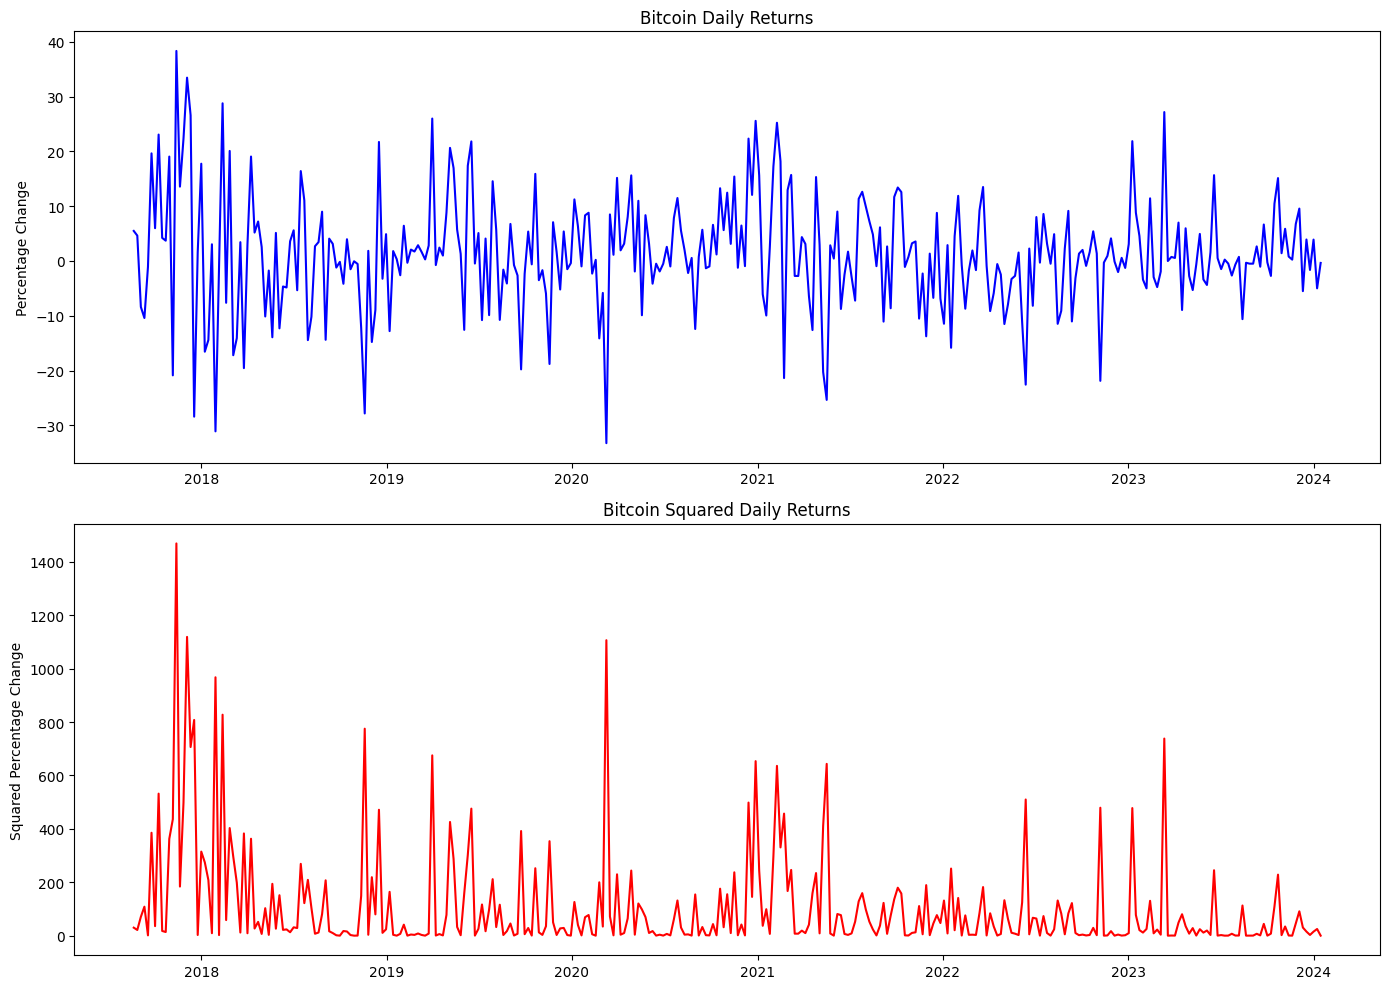

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate daily returns as percentage change in closing prices
btc_df['daily_returns'] = btc_df['close'].pct_change() * 100

# Calculate squared daily returns to visualize volatility clustering
btc_df['squared_daily_returns'] = btc_df['daily_returns']**2

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Daily Returns
ax[0].plot(btc_df['daily_returns'], color='blue')
ax[0].set_title('Bitcoin Daily Returns')
ax[0].set_ylabel('Percentage Change')

# Squared Daily Returns
ax[1].plot(btc_df['squared_daily_returns'], color='red')
ax[1].set_title('Bitcoin Squared Daily Returns')
ax[1].set_ylabel('Squared Percentage Change')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Calculate daily returns as percentage change in closing prices
btc_df['daily_returns'] = btc_df['close'].pct_change() * 100

# Calculate squared daily returns to visualize volatility clustering
btc_df['squared_daily_returns'] = btc_df['daily_returns']**2

# Create subplots: two rows
fig = make_subplots(rows=2, cols=1, subplot_titles=('Bitcoin Daily Returns', 'Bitcoin Squared Daily Returns'))

# Daily Returns
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['daily_returns'],
                         mode='lines', name='Daily Returns',
                         line=dict(color='blue')), row=1, col=1)

# Squared Daily Returns
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['squared_daily_returns'],
                         mode='lines', name='Squared Daily Returns',
                         line=dict(color='red')), row=2, col=1)

# Update layout
fig.update_layout(height=600, width=800, title_text="Bitcoin Volatility Analysis",
                  template='plotly_dark')
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Daily Returns (%)", row=1, col=1)
fig.update_yaxes(title_text="Squared Daily Returns", row=2, col=1)

fig.show()


<ipython-input-581-5329a935b4aa>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-581-5329a935b4aa>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Feature Engineering

In [ ]:
# Data transformation: log transformation to stabilize variance
btc_df['log_close'] = np.log(btc_df['close'])


<ipython-input-582-f27ae697fba3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Data splitting
split_date = '2023-01-01'
train = btc_df.loc[btc_df.index < split_date]
test = btc_df.loc[btc_df.index >= split_date]

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train['scaled_close'] = scaler.fit_transform(train[['log_close']])

<ipython-input-584-f845617b6d3c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
btc_df.head()

,open,high,low,close,volume,coin,MA50,MA200,Return,daily_returns,squared_daily_returns,log_close
datetime,,,,,,,,,,,,
2017-08-14,4261.48,4485.39,3850.00,4086.29,2843.431426,BTCUSDT,NaN,NaN,NaN,NaN,NaN,8.315393
2017-08-21,4069.13,4453.91,3400.00,4310.01,4599.396629,BTCUSDT,NaN,NaN,0.054749,5.474893,29.974452,8.368696
2017-08-28,4310.01,4939.19,4124.54,4509.08,4753.843376,BTCUSDT,NaN,NaN,0.046188,4.618783,21.333154,8.413848
2017-09-04,4505.00,4788.59,3603.00,4130.37,6382.787745,BTCUSDT,NaN,NaN,-0.083988,-8.398831,70.540359,8.326122
2017-09-11,4153.62,4394.59,2817.00,3699.99,8106.705127,BTCUSDT,NaN,NaN,-0.104199,-10.419890,108.574102,8.216085


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
!pip install pmdarima

In [ ]:
from scipy.stats import norm

# Calculating VaR at 95% confidence level
btc_returns = btc_df['close'].pct_change().dropna()
mean = btc_returns.mean()
sigma = btc_returns.std()
confidence_level = 0.05

VaR_95 = norm.ppf(1 - confidence_level, mean, sigma)
print(f"VaR at 95% Confidence Level: {VaR_95}")

VaR at 95% Confidence Level: 0.18211888368879497


In [ ]:
btc_df.head()

,open,high,low,close,volume,coin,MA50,MA200,Return,daily_returns,squared_daily_returns,log_close
datetime,,,,,,,,,,,,
2017-08-14,4261.48,4485.39,3850.00,4086.29,2843.431426,BTCUSDT,NaN,NaN,NaN,NaN,NaN,8.315393
2017-08-21,4069.13,4453.91,3400.00,4310.01,4599.396629,BTCUSDT,NaN,NaN,0.054749,5.474893,29.974452,8.368696
2017-08-28,4310.01,4939.19,4124.54,4509.08,4753.843376,BTCUSDT,NaN,NaN,0.046188,4.618783,21.333154,8.413848
2017-09-04,4505.00,4788.59,3603.00,4130.37,6382.787745,BTCUSDT,NaN,NaN,-0.083988,-8.398831,70.540359,8.326122
2017-09-11,4153.62,4394.59,2817.00,3699.99,8106.705127,BTCUSDT,NaN,NaN,-0.104199,-10.419890,108.574102,8.216085


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(btc_df['close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.210522
p-value: 0.669053
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


<ipython-input-591-d4a5bae2bf29>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-591-d4a5bae2bf29>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-591-d4a5bae2bf29>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



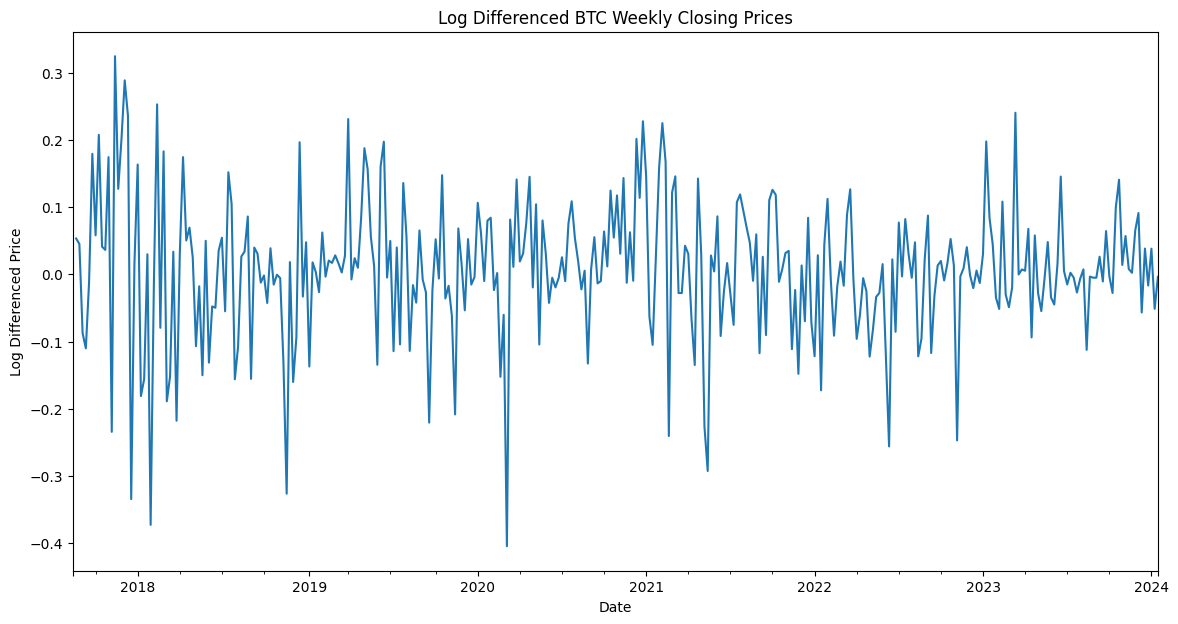

In [ ]:
# Differencing
btc_df['close_diff'] = btc_df['close'].diff()

# Log Transformation
btc_df['close_log'] = np.log(btc_df['close'])
btc_df['close_log_diff'] = btc_df['close_log'].diff()

# Visualize to check if the transformations made the data stationary
btc_df['close_log_diff'].plot(figsize=(14, 7), title='Log Differenced BTC Weekly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Log Differenced Price')
plt.show()


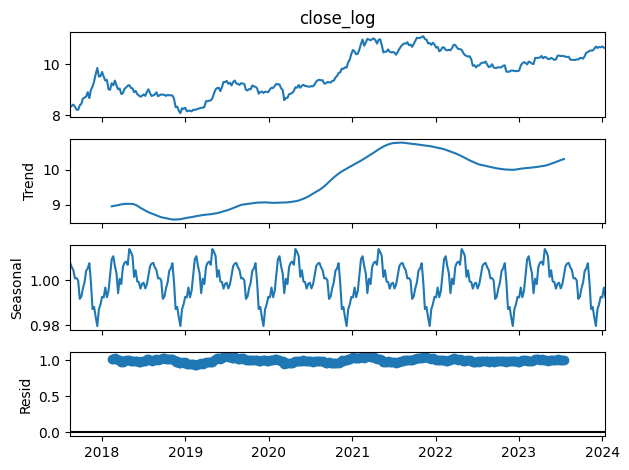

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(btc_df['close_log'].dropna(), model='multiplicative', period=52)
decompose_result.plot()
plt.show()


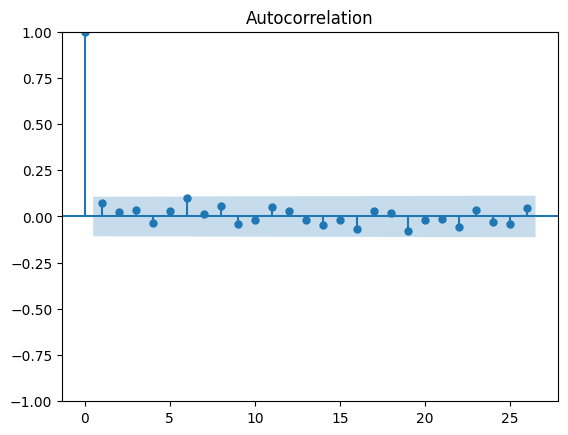

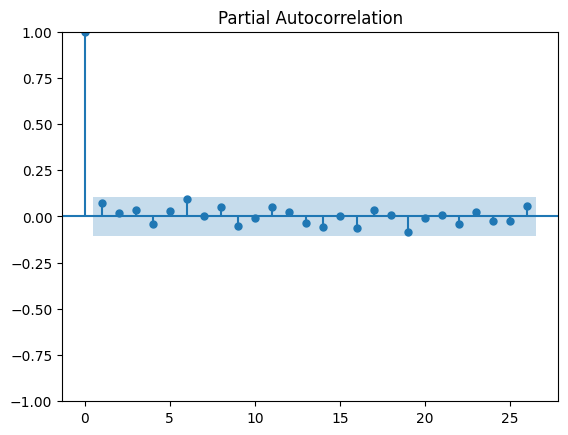

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(btc_df['close_log_diff'].dropna())
plt.show()

plot_pacf(btc_df['close_log_diff'].dropna())
plt.show()


# Modeling

# SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(btc_df['close_log'],
                order=(1,1,1),
                seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



                                     SARIMAX Results                                      
Dep. Variable:                          close_log   No. Observations:                  336
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                 188.840
Date:                            Sun, 21 Apr 2024   AIC                           -367.681
Time:                                    22:03:15   BIC                           -350.512
Sample:                                08-14-2017   HQIC                          -360.754
                                     - 01-15-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8358      0.163      5.127      0.000       0.516       1.155
ma.L1         -0.7568      0.197   

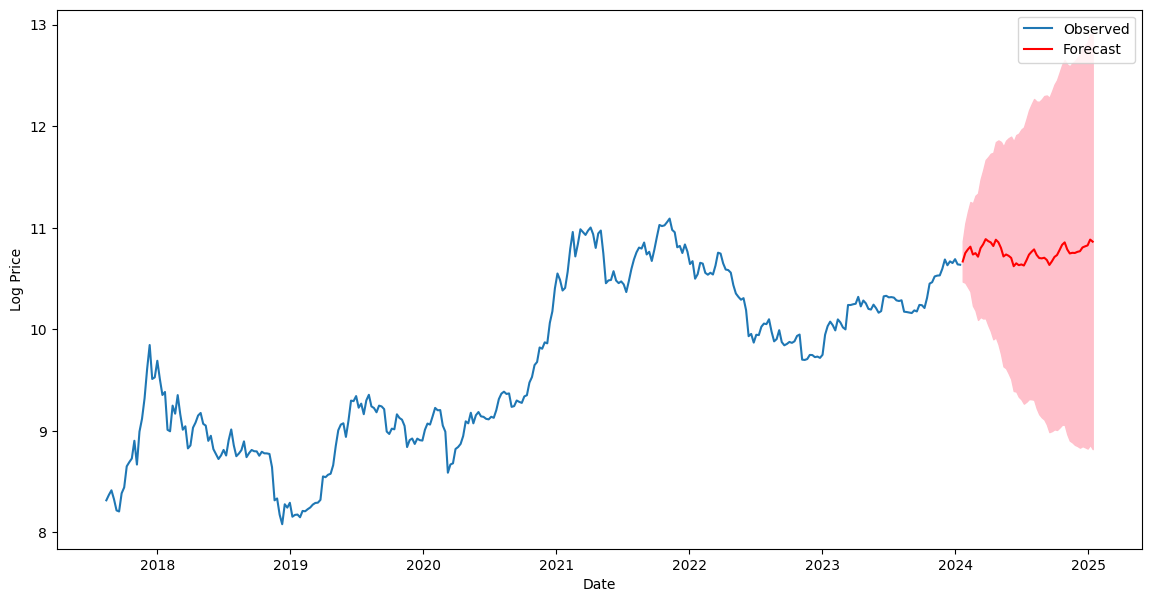

In [ ]:
forecast = results.get_forecast(steps=52)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the forecast alongside the original series
plt.figure(figsize=(14, 7))
plt.plot(btc_df.index, btc_df['close_log'], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.show()


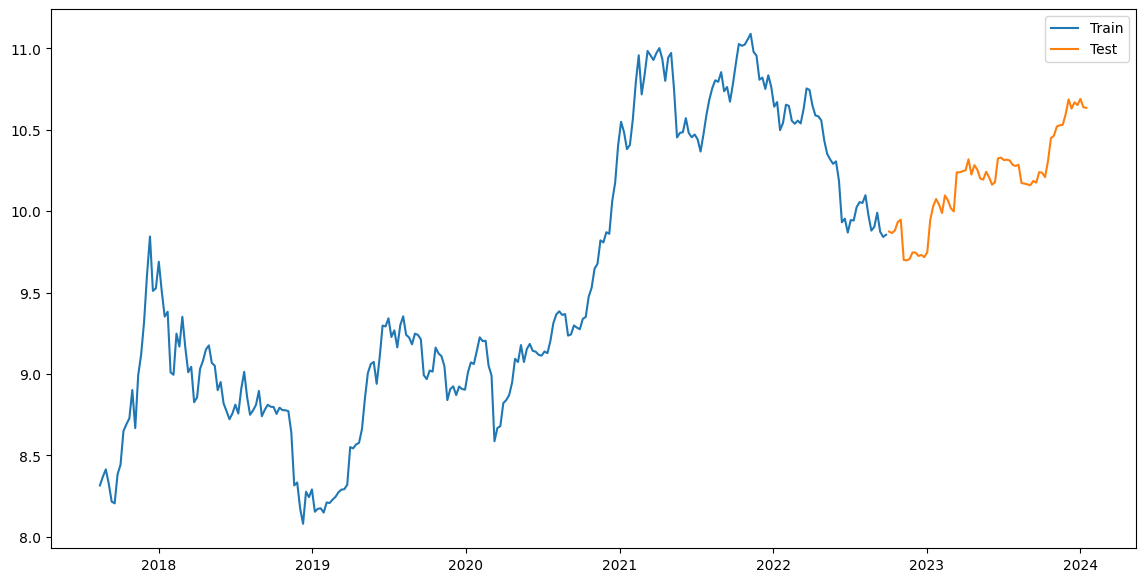

In [ ]:


# Define a split point
split_point = int(len(btc_df) * 0.8)  # 80% for training, 20% for testing
train, test = btc_df['close_log'][:split_point], btc_df['close_log'][split_point:]

# Visualize the train-test split
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.legend()
plt.show()


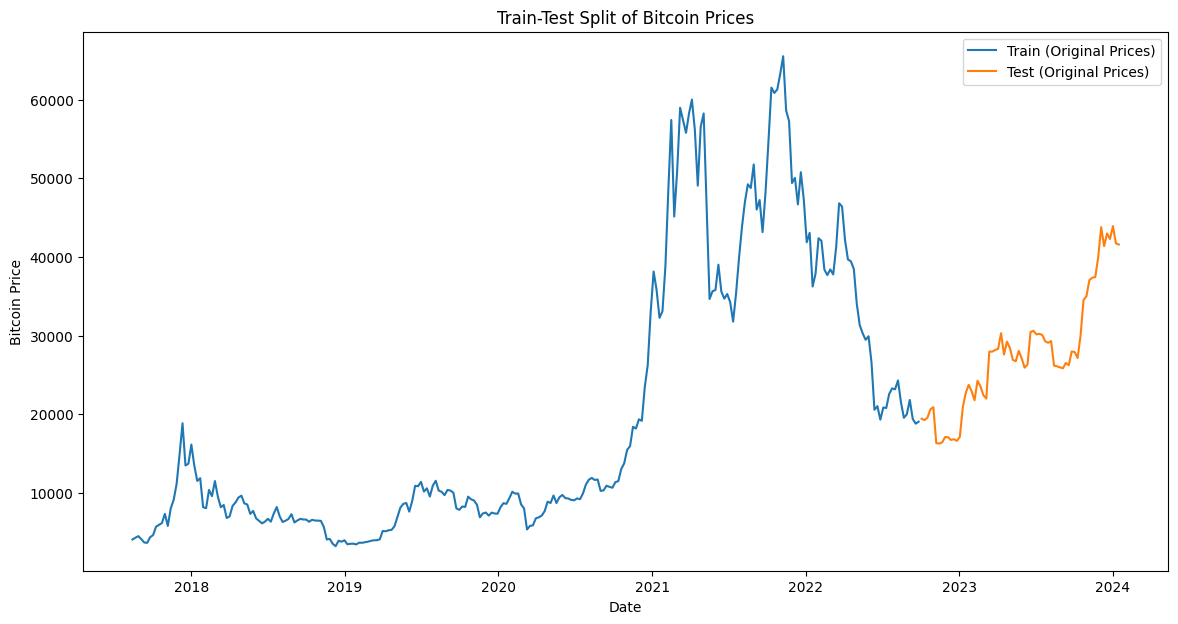

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the log-transformed 'train' and 'test' back to original Bitcoin prices
train_prices = np.exp(train)
test_prices = np.exp(test)

# Visualize the train-test split in original Bitcoin prices
plt.figure(figsize=(14,7))
plt.plot(train.index, train_prices, label='Train (Original Prices)')
plt.plot(test.index, test_prices, label='Test (Original Prices)')
plt.legend()
plt.title('Train-Test Split of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.show()


In [ ]:
forecast = results.get_forecast(steps=len(test))
mean_forecast_log = forecast.predicted_mean
confidence_intervals_log = forecast.conf_int()


In [ ]:
mean_forecast = np.exp(mean_forecast_log)
confidence_intervals = np.exp(confidence_intervals_log[['lower close_log', 'upper close_log']])


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


test_original = np.exp(test)

rmse = sqrt(mean_squared_error(test_original, mean_forecast))
print(f'RMSE: {rmse}')


RMSE: 23558.521883610247


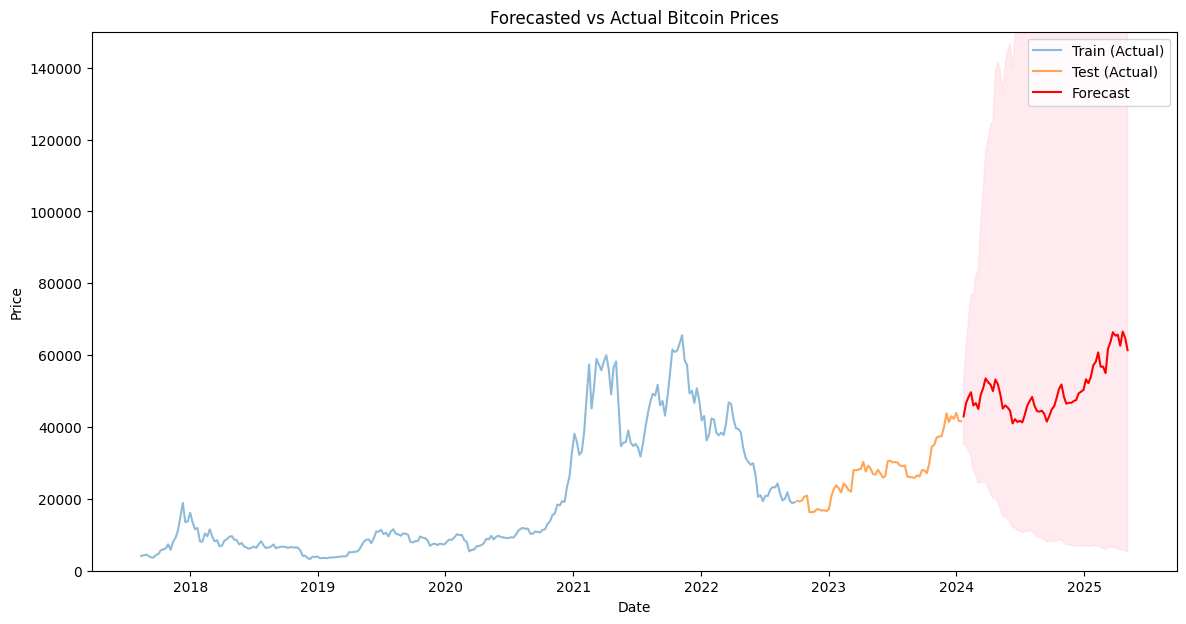

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(train.index, np.exp(train), label='Train (Actual)', alpha=0.5)
plt.plot(test.index, np.exp(test), label='Test (Actual)', alpha=0.7)
plt.plot(mean_forecast.index, mean_forecast, color='red', label='Forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals['lower close_log'],
                 confidence_intervals['upper close_log'], color='pink', alpha=0.3)
plt.title('Forecasted vs Actual Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.ylim(0, 150000)  # Set y-axis limits from 0 to 150,000
plt.show()


In [ ]:
import numpy as np

# Apply a logarithmic transformation to the 'volume' column to reduce skewness
btc_df['volume_log'] = np.log(btc_df['volume'] + 1)  # Adding 1 to avoid log(0)


<ipython-input-604-bf570854e0a5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model_with_volume = SARIMAX(btc_df['close_log'][:split_point],
                            exog=btc_df['volume_log'][:split_point],
                            order=(1,1,1),
                            seasonal_order=(1,1,1,52),
                            enforce_stationarity=False,
                            enforce_invertibility=False)

results_with_volume = model_with_volume.fit()
print(results_with_volume.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



                                     SARIMAX Results                                      
Dep. Variable:                          close_log   No. Observations:                  268
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                 122.466
Date:                            Sun, 21 Apr 2024   AIC                           -232.933
Time:                                    22:03:55   BIC                           -214.444
Sample:                                08-14-2017   HQIC                          -225.426
                                     - 09-26-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
volume_log    -0.0451      0.018     -2.525      0.012      -0.080      -0.010
ar.L1          0.8378      0.176   

In [ ]:
# Generate forecasts for the test set
forecast = results.get_forecast(steps=len(test), exog=btc_df['volume_log'][split_point:])
mean_forecast = np.exp(forecast.predicted_mean)
confidence_intervals = np.exp(forecast.conf_int())

# Calculate RMSE for the test set
rmse_test = sqrt(mean_squared_error(np.exp(test), mean_forecast))
print(f'Test RMSE: {rmse_test}')

# Generate forecasts for the test set
forecast = results.get_forecast(steps=len(test), exog=btc_df['volume_log'][split_point:])
mean_forecast = np.exp(forecast.predicted_mean)
confidence_intervals = np.exp(forecast.conf_int())

# Calculate RMSE for the test set
rmse_test = sqrt(mean_squared_error(np.exp(test), mean_forecast))
print(f'Test RMSE: {rmse_test}')



Test RMSE: 23558.521883610247
Test RMSE: 23558.521883610247


In [ ]:
!pip install sklearn
from sklearn.metrics import mean_absolute_error

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import numpy as np
# Calculate the mean absolute error (MAE) for the test set
mae_test = mean_absolute_error(np.exp(test), mean_forecast)
print(f'Test MAE: {mae_test}')


Test MAE: 22819.130178756976


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:


import numpy as np
mape_test = mean_absolute_percentage_error(np.exp(test), mean_forecast) * 100
print(f'Test MAPE: {mape_test:.2f}%')


Test MAPE: 93.24%


# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_arima = ARIMA(train, order=(1, 1, 1))
results_arima = model_arima.fit()

# Forecast
forecast_arima = results_arima.forecast(steps=len(test))
forecast_arima = np.exp(forecast_arima)  # Convert back to original scale if working with log-transformed data

# Evaluate
rmse_arima = sqrt(mean_squared_error(np.exp(test), forecast_arima))
print(f'ARIMA Model RMSE: {rmse_arima}')


ARIMA Model RMSE: 11573.339744102086


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



In [ ]:


import numpy as np
mae_arima = mean_absolute_error(np.exp(test), forecast_arima)
print(f'ARIMA Model MAE: {mae_arima}')


ARIMA Model MAE: 9364.997376914183


In [ ]:


import numpy as np
mape_arima = mean_absolute_percentage_error(np.exp(test), forecast_arima) * 100
print(f'ARIMA Model MAPE: {mape_arima:.2f}%')


ARIMA Model MAPE: 30.09%


# LSTM

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

def reset_random_seeds():
    np.random.seed(1)
    python_random.seed(12)
    tf.random.set_seed(123)
reset_random_seeds()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt


data = btc_df[['close']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60  # Number of time steps to look back
X, y = create_sequences(data_scaled, sequence_length)

# Splitting data into training and testing
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
7/7 - 3s - loss: 0.1259 - 3s/epoch - 390ms/step
Epoch 2/100
7/7 - 0s - loss: 0.0341 - 53ms/epoch - 8ms/step
Epoch 3/100
7/7 - 0s - loss: 0.0206 - 54ms/epoch - 8ms/step
Epoch 4/100
7/7 - 0s - loss: 0.0204 - 50ms/epoch - 7ms/step
Epoch 5/100
7/7 - 0s - loss: 0.0147 - 50ms/epoch - 7ms/step
Epoch 6/100
7/7 - 0s - loss: 0.0134 - 52ms/epoch - 7ms/step
Epoch 7/100
7/7 - 0s - loss: 0.0124 - 52ms/epoch - 7ms/step
Epoch 8/100
7/7 - 0s - loss: 0.0113 - 53ms/epoch - 8ms/step
Epoch 9/100
7/7 - 0s - loss: 0.0112 - 56ms/epoch - 8ms/step
Epoch 10/100
7/7 - 0s - loss: 0.0105 - 52ms/epoch - 7ms/step
Epoch 11/100
7/7 - 0s - loss: 0.0099 - 53ms/epoch - 8ms/step
Epoch 12/100
7/7 - 0s - loss: 0.0094 - 52ms/epoch - 7ms/step
Epoch 13/100
7/7 - 0s - loss: 0.0093 - 52ms/epoch - 7ms/step
Epoch 14/100
7/7 - 0s - loss: 0.0089 - 57ms/epoch - 8ms/step
Epoch 15/100
7/7 - 0s - loss: 0.0079 - 57ms/epoch - 8ms/step
Epoch 16/100
7/7 - 0s - loss: 0.0080 - 60ms/epoch - 9ms/step
Epoch 17/100
7/7 - 0s - loss: 0.0

In [ ]:
# Making predictions
predictions = model.predict(X_test)

# Inverse transform predictions and y_test to original scale
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse_lstm = sqrt(mean_squared_error(y_test_original, predictions_original))
print(f'LSTM Model RMSE: {rmse_lstm}')


2/2 [==============================] - 1s 7ms/step
LSTM Model RMSE: 3101.7453874921284


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_original, predictions_original)
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


MAE: 2617.7561523437503
MAPE: 9.466092078564238%


In [ ]:


mae = mean_absolute_error(y_test_original, predictions_original)
print(f"MAE: {mae}")


MAE: 2617.7561523437503


In [ ]:


import numpy as np
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100
print(f"MAPE: {mape}%")


MAPE: 9.466092078564238%


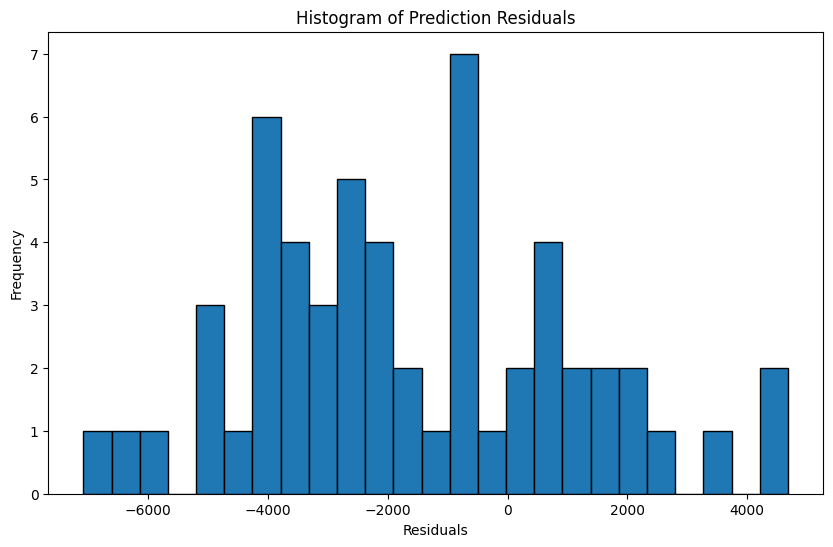

In [ ]:
residuals = y_test_original - predictions_original

# Plotting residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=25, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Residuals')
plt.show()


# LSTM - KERAS TUNER/HYPER PARAMETER TUNING

In [ ]:
pip install keras-tuner --upgrade


In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

def reset_random_seeds():
    np.random.seed(1)
    python_random.seed(12)
    tf.random.set_seed(123)
reset_random_seeds()


In [ ]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from keras.layers import Dropout

class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                       input_shape=self.input_shape,
                       return_sequences=True))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

# X_train's shape is [samples, timesteps, features]
hypermodel = LSTMHyperModel(input_shape=(X_train.shape[1], 1))

tuner = RandomSearch(hypermodel,
                     objective='val_loss',
                     max_trials=5,
                     executions_per_trial=2,
                     directory='lstm_tuning',
                     project_name='bitcoin_price_prediction')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

# Get the best model and evaluate on the test set
best_model = tuner.get_best_models(num_models=1)[0]
test_loss = best_model.evaluate(X_test, y_test)


Reloading Tuner from lstm_tuning/bitcoin_price_prediction/tuner0.json


2/2 [==============================] - 1s 12ms/step - loss: 0.0066


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


In [ ]:
data = btc_df[['close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create sequences and corresponding labels
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        seq = data[i:(i + sequence_length)]
        label = data[i + sequence_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)


In [ ]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   input_shape=(X.shape[1], X.shape[2]),
                   return_sequences=True))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model


In [ ]:
tuner = RandomSearch(build_lstm_model,
                     objective='val_loss',
                     max_trials=5,
                     executions_per_trial=2,
                     directory='keras_tuner_lstm',
                     project_name='btc_price_prediction')

# Split data into training and validation
split_point = int(len(X) * 0.8)
X_train, X_val = X[:split_point], X[split_point:]
y_train, y_val = y[:split_point], y[split_point:]

tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)


Reloading Tuner from keras_tuner_lstm/btc_price_prediction/tuner0.json


In [ ]:
#  X_test, y_test are prepared similarly to X_train, y_train
predictions_scaled = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)  # If data was scaled

# Inverse scaling actual test values for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE or other relevant metrics
rmse_test = sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Test RMSE: {rmse_test}")

# Additional metrics
mae_test = mean_absolute_error(y_test_actual, predictions)
print(f"Test MAE: {mae_test}")


2/2 [==============================] - 1s 7ms/step
Test RMSE: 5052.612881769221
Test MAE: 4083.6228989955353


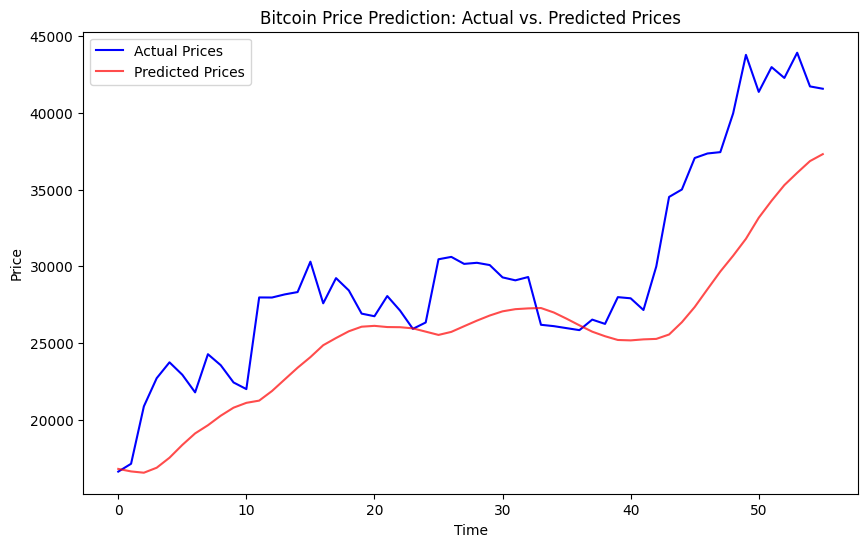

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red', alpha=0.7)
plt.title('Bitcoin Price Prediction: Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:


mape = mean_absolute_percentage_error(y_test_actual, predictions) * 100
print(f"Test MAPE: {mape:.2f}%")


Test MAPE: 12.98%
